# Plotting the results of spacetrees

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dispersal rate

First we load the dispersal rates

In [82]:
filename = 'data/test_10M_%sT.sigma'
sigmas = []
Ts = [None,10000] #time cutoffs
for T in Ts:
    sigmas.append(np.loadtxt(filename %T, delimiter=','))

And we can compare them to the simulated truth

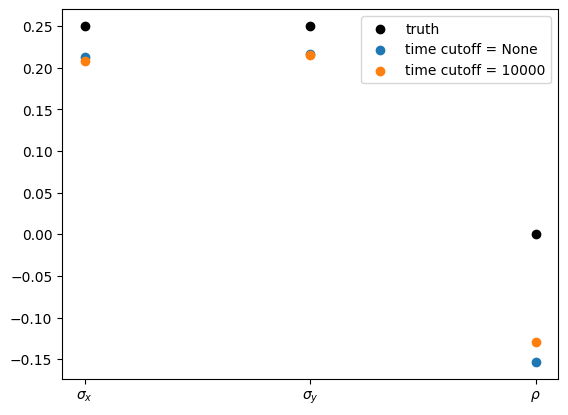

In [95]:
plt.scatter([1,2,3],[0.25,0.25,0], label='truth', c='k')
for i,sigma in enumerate(sigmas):
    plt.scatter([1,2,3], sigma[:3], label='time cutoff = %s' %str(Ts[i]))
plt.xticks([1,2,3], labels=[r'$\sigma_x$',r'$\sigma_y$',r'$\rho$'])
plt.legend()
plt.show()

We see we do a decent job estimating the standard deviations in x and y movements, $\sigma_x$ and $\sigma_y$, and in this case underestimate the correlation in movement between x and y, $\rho$. The time cutoff isn't having a big effect here. Perhaps an even smaller value, like 1000, would make more of a difference.

## Ancestor locations

Load the data

In [114]:
locations = np.loadtxt('data/test.locations') #sample locations

In [122]:
T = None #time cutoff
loci = [1,11,21,31,41,51,61,71,81,91] #loci at which we located ancestors
sample = 0 #sample we are interested in plotting

ancestor_locations = []
for locus in loci:
    with open('data/test_chr1_%dlocus_10M_%sT_Alls_Allt.locs' %(locus,str(T)), 'r') as f:
        for line in f:
            if line.split(',')[0]==str(sample):
                ancestor_locations.append([float(i) for i in line.strip().split(',')[1:]]) #time,x,y
ancestor_locations = np.array(ancestor_locations)

And now plot the distribution of ancestor locations over loci at various times

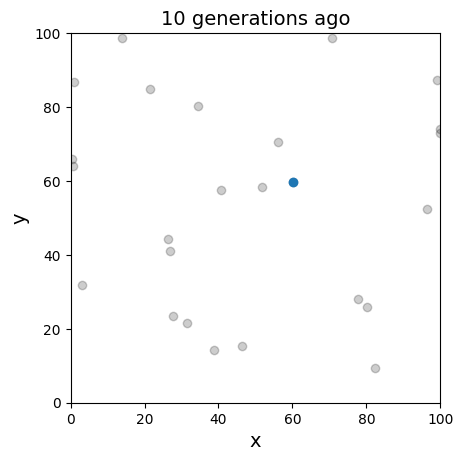

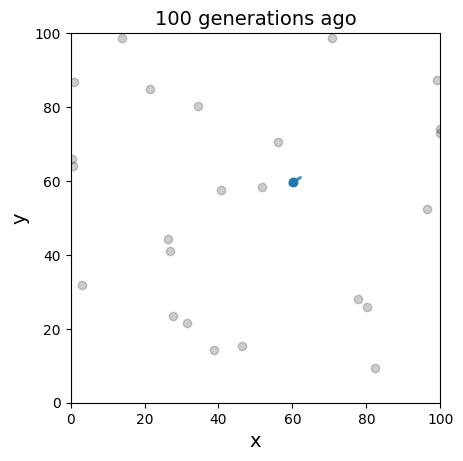

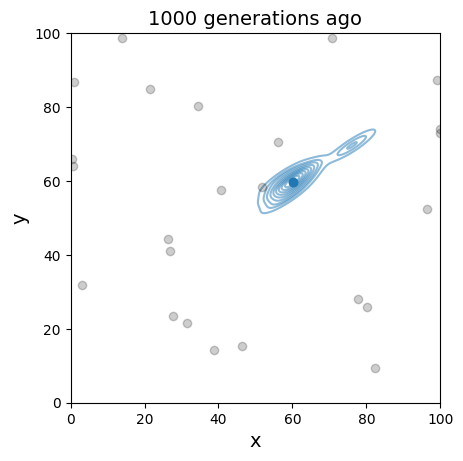

In [136]:
ancestor_times = np.unique(ancestor_locations[:,0]) #times we are looking at
sample_color = plt.get_cmap('tab10')(0) #choose your color

for i,t in enumerate(ancestor_times):
    
    fig = plt.figure() #set up figure
    ax = fig.add_subplot(111, aspect='equal') #and axis
    
    ax.scatter(locations[:,0], locations[:,1], color='k', alpha=0.1) #all samples
    ax.scatter(locations[sample,0], locations[sample,1], color=sample_color, alpha=1) #focal samples

    sns.kdeplot(x=ancestor_locations[i::3,1], y=ancestor_locations[i::3,2], ax=ax, zorder=0, color=sample_color, alpha=0.5) #inferred ancestor distribution
    
    # aesthetics
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    
    plt.show()

Here we see that these ancestors of the sample only start to spread out and move away after 100s of generations. It might make more sense then to use a linear time scale for the ancestor times (eg, 1000, 2000, ...). And using a larger chromosome with more loci, or additional chromosomes, would allow us to locate ancestors at more unrelated parts of the genome, which may spread out from each other faster. But I hope this gets you started.